# 심파이로 공부하는 미적분
* `함수`는 입력데이터를 받아서 출력데이터를 만들어 내보내는 과정이며, 궁극적으로 우리가 원하는 출력데이터를 만들어주는 좋은 분석함수를 찾는 과정이 `미분`이다.
* `미분`은 함수의 입력값이나 계수가 바뀌었을때 함수의 출력이 어떻게 변하는지 알고자 하는것.
* `적분`은 `미분`의 반대이다.

## 4.1 함수

### 연속과 불연속
* 불연속은 함수의 값이 중간에 갑자기 변하는 것을 `불연속`이라 하고 그렇지 않으면 `연속`이라고 함
* `부호함수`, `단위계단함수`, `지시함수`는 데이터분석에서 자주 등장하는 불연속함수

In [1]:
import numpy as np


warnings.filterwarnings("ignore")
from matplotlib import font_manager, rc
font_name  = font_manager.FontProperties(fname = "c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family = font_name)
# 마이너스 부호 표시 
plt.rcParams['axes.unicode_minus'] = False

### 부호함수
* 입력값이 양수이면 1이고, 음수이면 -1, 0이면 0을 출력하는 불연속함수

In [2]:
np.sign(-0.0001), np.sign(0), np.sign(0.0001)

(-1.0, 0, 1.0)

### 단위계단함수
* x = 0에서 불연속함수, 넘파이로 구현된 함수가 없어서 직접 구현해야 함.

In [3]:
def heaviside_step(x):
    if isinstance(x, np.ndarray):
        return np.where(x >= 0, 1, 0) # x > 0보다 큰 값은 1이고, 아니면 0을 리턴
    else:
        return 1.0 if x >= 0 else 0.0 # 다항 연산자 

In [4]:
heaviside_step(-0.0001), heaviside_step(0), heaviside_step(0.0001)

(0.0, 1.0, 1.0)

### 지시함수
* 아래 첨자로 미리 지정된값이 들어오면 출력 1이되고 아니면 출력 0이 된다.
* 데이터 중에서 특정한 데이터만 선택하여 갯수를 세는 경우 사용.

### 역함수
* 어떤 함수의 입력/출력 관계와 정반대의 입출력 관계를 갖는 함수.
* y = f(x)  --> x = f^-1(y)

### 함수의 그래프

In [5]:
def f(x):
    return x ** 3 - 3 * x**2 + x

In [6]:
x = np.linspace(-1, 3, 9)  # -1부터 3까지 0.5간격으로 점을 찍음.
x

array([-1. , -0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ])

In [7]:
y = f(x)
y

array([-5.   , -1.375,  0.   , -0.125, -1.   , -1.875, -2.   , -0.625,
        3.   ])

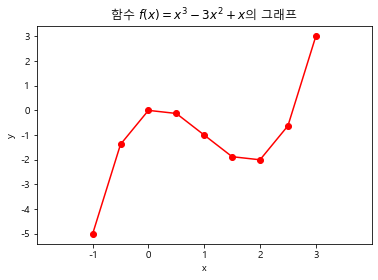

In [8]:
plt.plot(x, y, 'ro-')  # rs- : 빨간 사각형에 대쉬
plt.xlim(-2, 4)
plt.title("함수 $f(x) = x^3 - 3x^2 + x$의 그래프")
plt.xlabel('x')
plt.ylabel('y')
plt.xticks(np.arange(-1, 4))
plt.yticks(np.arange(-5, 4))
plt.show()

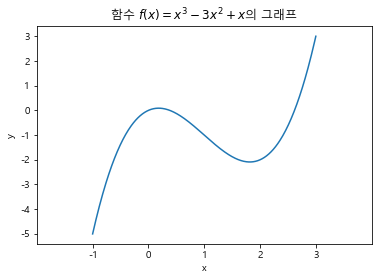

In [9]:
x = np.linspace(-1, 3, 400)
y = f(x)
plt.plot(x, y)  
plt.xlim(-2, 4)
plt.title("함수 $f(x) = x^3 - 3x^2 + x$의 그래프")
plt.xlabel('x')
plt.ylabel('y')
plt.xticks(np.arange(-1, 4))
plt.yticks(np.arange(-5, 4))
plt.show()

### 맷플롯립으로 부호함수와 단위계단함수  시각화

**부호함수**

In [10]:
def sign_func(x):
    return np.sign(x)

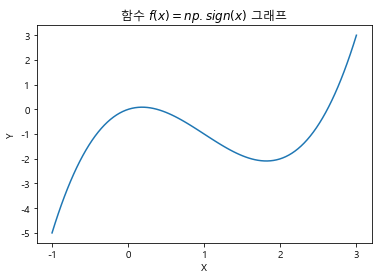

In [11]:
x = np.linspace(-1, 3, 100)
y = f(x)

plt.plot(x, y)
plt.title("함수 $f(x) = np.sign(x)$ 그래프")
plt.xlabel('X')
plt.ylabel('Y')
plt.xticks(np.arange(-1, 4))
plt.yticks(np.arange(-5, 4))
plt.show()

**계단함수**

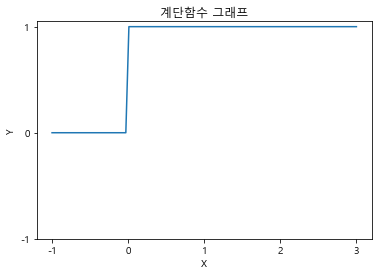

In [12]:
x = np.linspace(-1, 3, 100)
y = heaviside_step(x)

plt.plot(x, y)
plt.title("계단함수 그래프")
plt.xlabel('X')
plt.ylabel('Y')
plt.xticks(np.arange(-1, 4))
plt.yticks(np.arange(-1, 2))
plt.show()

### 역함수의 그래프 

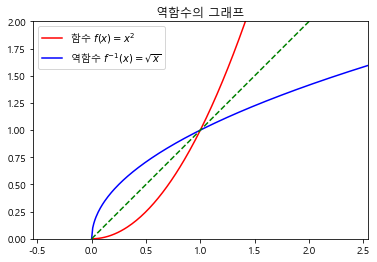

In [13]:
def f1(x):
    return x ** 2

def f1inv(x):
    return np.sqrt(x)

x = np.linspace(0, 3,  300)
plt.plot(x, f1(x), 'r-', label ='함수 $f(x) = x^2$')
plt.plot(x, f1inv(x), 'b-', label = '역함수 $f^{-1}(x) = \sqrt{x}$')
plt.plot(x, x, 'g--')
plt.axis('equal')
plt.xlim(0, 2)
plt.ylim(0, 2)
plt.legend()  # 범례가 보이고.
plt.title("역함수의 그래프")
plt.show()

### 데이터 분석에서 많이 사용되는 함수들

**최대함수와 최소함수**
* max(x, y) , min(x, y) : 인자로 받은 두 수중에서 큰 값 혹은 작은값을 리턴
* 인공신경망에서는 이것을 `ReLU(Rectified Linear Unit)`이라고 한다.

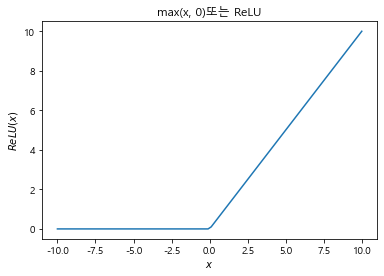

In [14]:
xx = np.linspace(-10, 10, 100)
plt.plot(xx, np.maximum(xx, 0))  # 0보다 크면 그대로 출력하고 0보다 작으면 0으로 출력
plt.title("max(x, 0)또는 ReLU")
plt.xlabel("$x$")
plt.ylabel("$ReLU(x)$")
plt.show()

**지수함수**
* 정해진 어떤 값을 입력값으로 거듭제곱하여 출력을 구하는 함수 $y=a^x$ 
* 거듭제곱을 할 때 아래에 있는 수를 밑(base)라고 한다. 밑을 오일러 수 e(약 2.718)로 하여 거듭제곱을 하는 함수를 `지수함수`라고 한다.

In [15]:
np.e

2.718281828459045

In [16]:
np.exp(-10), np.exp(-1),np.exp(-0.1), np.exp(10)

(4.5399929762484854e-05,
 0.36787944117144233,
 0.9048374180359595,
 22026.465794806718)

지수함수는 다음과 같은 특성을 갖는다.
* 양수(e)를 거듭제곱한 값이므로 항상 양수다.
* x = 0일때 1이 딘다.
* x가 양의 무한대로 가면, 양의 무한대로 간다.
* x가 음의 무한댈 가면, 0으로 다가간다.
* x1 > x2이면 exp x1 > exp x2이다.

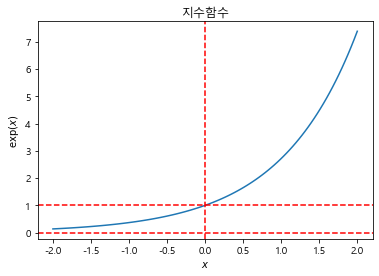

In [17]:
xx = np.linspace(-2, 2,100)
yy = np.exp(xx)

plt.title("지수함수")
plt.plot(xx, yy)
plt.axhline(1, c = 'r', ls = '--')  # 시작점이 1인 수평선
plt.axhline(0, c = 'r', ls = '--')  # 시작점이 0인 수평선
plt.axvline(0, c = 'r', ls = '--')  # 시작점이 0인 수직선
plt.xlabel("$x$")
plt.ylabel("$\exp(x)$")
plt.show()

In [18]:
np.exp(2 + 3) , np.exp(2) * np.exp(3)

(148.4131591025766, 148.4131591025766)

**로지스틱함수**
* 로지스틱함수는 지수함수를 변형한 함수로 회귀분석이나 인공신경망에서 자주 사용된다.
* 시그모이드 함수의 하나이다.

$\sigma\$ = 1/ (1 + exp(-x))

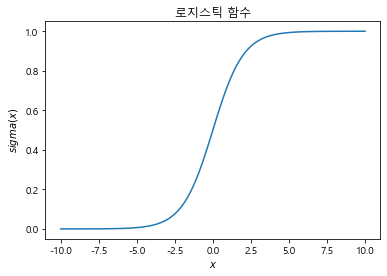

In [19]:
def logistic(x):
    return 1 / (1 + np.exp(-x))


xx = np.linspace(-10, 10, 100)
plt.plot(xx, logistic(xx))
plt.title("로지스틱 함수")
plt.xlabel("$x$")
plt.ylabel("$sigma(x)$")
plt.show()

**로그함수**
* e를 거듭제곱하여 특정한 값이 되는 수를 찾아야 할때.
* e를 거듭제곱하여 특정한 수 a가 되도록 하는 수를 log a라 표기하고 `로그`라고 읽는다.

In [20]:
np.log(10)  # e를 거듭제곱하여 10이 되는 수는?

2.302585092994046

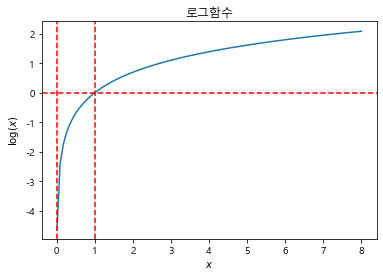

In [21]:
xx = np.linspace(0.01, 8, 100)
yy = np.log(xx)
plt.title("로그함수")
plt.plot(xx, yy)
plt.axhline(0, c = 'r', ls = '--')
plt.axvline(0, c = 'r', ls = '--')
plt.axvline(1, c = 'r', ls = '--')
plt.xlabel("$x$")
plt.ylabel("$\log(x)$")
plt.show()

* **로그함수의 성질 1 : 로그함수는 곱하기를 더하기로 변한다.**

### 문제) 4.12 log2값은 약 0.69, log3값은 약 1.10. 이때 log12값을 구하면?

In [22]:
np.log(2), np.log(3)

(0.6931471805599453, 1.0986122886681098)

In [23]:
2 * np.log(2) + np.log(3)

2.4849066497880004

### 문제) 4.13 로지스틱함수의 역함수를 구하라.

* **로그함수의 성질 2 : 어떤 함수에 로그를 적용해도 함수의 최고점, 최저점의 위치는 변하지 않는다.**

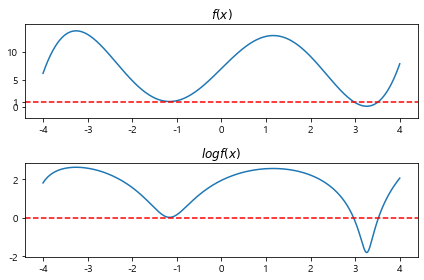

In [24]:
def ff(x):
    return x ** 3 - 12*x + 20 * np.sin(x) + 7


xx = np.linspace(-4, 4, 300)
yy = ff(xx)

plt.subplot(211)
plt.plot(xx, yy)
plt.axhline(1, c = 'r', ls = '--')
plt.yticks([0, 1, 5, 10])
plt.ylim(-2, 15)
plt.title("$f(x)$")

plt.subplot(212)
plt.plot(xx, np.log(yy))
plt.axhline(0, c= 'r', ls = '--')
plt.title("$log f(x)$")

plt.tight_layout()
plt.show()

* **로그함수의 성질 3 : 로그함수는 0부터 1사이의 작은값을 확대시켜 보여준다.**

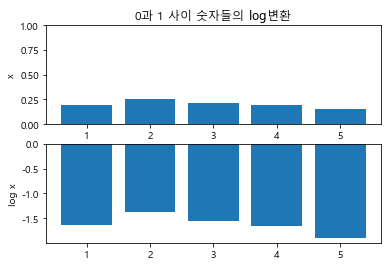

In [25]:
np.random.seed(0)
x = np.random.rand(5)  # 0과 1사이의 수를 5개 리턴.
x = x / x.sum()

plt.subplot(211)
plt.title("0과 1 사이 숫자들의 $\log$변환")
plt.bar(range(1, 6), x)
plt.ylim(0, 1)
plt.ylabel("x")

plt.subplot(212)
plt.bar(range(1, 6), np.log(x))
plt.ylabel("log x")

plt.show()

**소프트 플러스함수**
* 지수함수와 로그함수를 결합하여 만든 함수로 0을 인수로 갖는 최대함수와 비슷하지만 x = 0근처에서 값이 부드럽게 변한다는 장점이 있다.
* $\zeta(x) = log(1 + exp(x))$

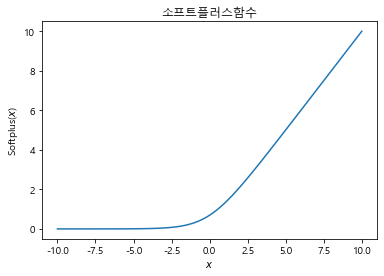

In [26]:
def softplus(x):
    return np.log(1 + np.exp(x))

xx = np.linspace(-10, 10, 100)
plt.plot(xx, softplus(xx))
plt.title("소프트플러스함수")
plt.xlabel("$x$")
plt.ylabel("Softplus($x$)")
plt.show()

**다변수함수**
* $z = f(x,y)$ 두개의 독립변수를 가는 함수 $f(x, y)$의 예로는 위도 $x$와 경도 $y$를 입력받아 해발 고도 $z$를 출력하는 함수

* $f(x, y) = 2 * x^2 + 6xy + 7y^2 - 26x - 54y + 107$

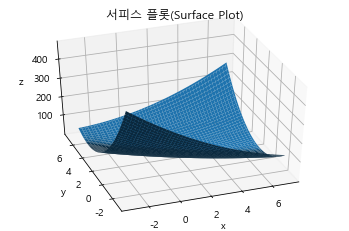

In [27]:
def f(x, y):
    return 2 * x**2 + 6*x*y + 7* y**2 - 26*x - 54*y + 107

xx = np.linspace(-3, 7, 100)
yy = np.linspace(-3, 7, 100)
X, Y = np.meshgrid(xx, yy)

Z = f(X, Y)

fig = plt.figure()
ax = fig.gca(projection = '3d')
ax.plot_surface(X, Y, Z, linewidth = 0.1)
ax.view_init(40, -110)
plt.xlabel("x")
plt.ylabel("y")
ax.set_zlabel('z')
plt.title("서피스 플롯(Surface Plot)")
plt.show()

* [맵플롯릿 컨투어 데모](https://matplotlib.org/gallery/images_contours_and_fields/contour_demo.html#sphx-glr-gallery-images-contours-and-fields-contour-demo-py)

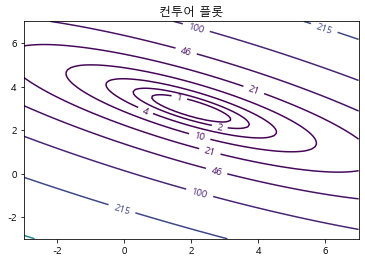

In [28]:
CS = plt.contour(X, Y, Z, levels = np.logspace(0, 3, 10))
plt.clabel(CS, fmt = '%d')
plt.title("컨투어 플롯")
plt.show()

**분리 가능 다변수함수**
다변수함수 중에는 단변수함수의 곱으로 표현 가능한 다변수 함수도 있다.

$f(x, y) = f_1(x)f_2(y)$

이러한 다변수함수를 **분리 가능 다변수함수(separable multivariate function)** 라고 하며 추후 확률변수에서 중요한 역할을 함

**[예제]**

$g(x, y) = exp(-x^2 - 16y^2) = exp(-x^2)exp(-16y^2) = g_1(x)g_2(y)$

아래 그림은 y = 0, 0.1, 0.2, 0.3으로 고정했을 때 생기는 단면의 모양을 나타낸 것.

left :  0.1
bottom :  0.1
width :  0.65
height :  0.65
bottom_h :  0.77
base 값 :  CompositeGenericTransform(
    TransformWrapper(
        BlendedAffine2D(
            IdentityTransform(),
            IdentityTransform())),
    CompositeGenericTransform(
        BboxTransformFrom(
            TransformedBbox(
                Bbox(x0=0.0, y0=0.0, x1=1.0, y1=1.0),
                TransformWrapper(
                    BlendedAffine2D(
                        IdentityTransform(),
                        IdentityTransform())))),
        BboxTransformTo(
            TransformedBbox(
                Bbox(x0=0.77, y0=0.1, x1=0.97, y1=0.75),
                BboxTransformTo(
                    TransformedBbox(
                        Bbox(x0=0.0, y0=0.0, x1=8.0, y1=8.0),
                        Affine2D(
                            [[72.  0.  0.]
                             [ 0. 72.  0.]
                             [ 0.  0.  1.]]))))))) Type : <class 'matplotlib.transforms.CompositeGenericTra

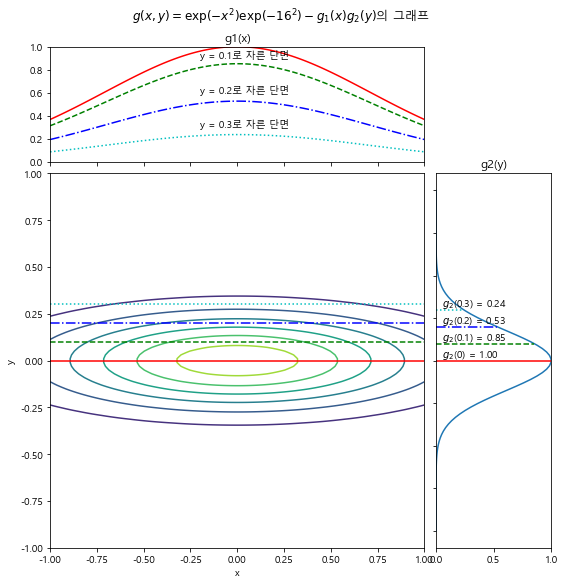

In [29]:
from matplotlib import transforms
from matplotlib.ticker import NullFormatter

def g1(x):
    return np.exp(-x ** 2)

def g2(y):
    return np.exp(-16 * y  ** 2)

def g(x, y):
    return g1(x) * g2(y)

xx = np.linspace(-1, 1, 100)
yy = np.linspace(-1, 1, 100)
X, Y = np.meshgrid(xx, yy)
Z = g(X, Y)

# 캔버스가 위치해야 되는 위치결정
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
bottom_h = left_h = left + width + 0.02
rect = [left, bottom, width, height]
rectx = [left,bottom_h, width, 0.2]
recty = [left_h, bottom, 0.2, height]

plt.figure(1, figsize=(8, 8))

ax = plt.axes(rect)
print('left : ', left)
print('bottom : ', bottom)
print('width : ', width)
print('height : ', height)

axx = plt.axes(rectx)
print('bottom_h : ', bottom_h)
axy = plt.axes(recty)

nullfmt = NullFormatter()

axx.xaxis.set_major_formatter(nullfmt)
axy.yaxis.set_major_formatter(nullfmt)

# 첫번째 가장 큰 사각형
ax.contour(X, Y, Z) 
ax.axhline(0, c = 'r', ls = '-')  #빨간색 수평 라인 
ax.axhline(0.1, c = 'g', ls = '--')  #초록색 실선라인
ax.axhline(0.2, c= 'b', ls = '-.')  # 파란색 -.라인
ax.axhline(0.3, c= 'c', ls = ':')  # 하늘색 점선라인
ax.set_xlabel("x")
ax.set_ylabel("y")

# 맨 위의 사각형
axx.plot(xx, g1(xx), c = 'r')
axx.plot(xx, g2(0.1) * g1(xx), c = 'g', ls = '--')
axx.plot(xx, g2(0.2) * g1(xx), c = 'b', ls = '-.')
axx.plot(xx, g2(0.3) * g1(xx), c = 'c', ls = ':')
axx.set_title("g1(x)")
axx.set_xlim(ax.get_xlim())  # (-1.0, 1.0)
axx.set_ylim(0, 1)
axx.text(-0.2, 0.3, 'y = 0.3로 자른 단면')
axx.text(-0.2, 0.6, 'y = 0.2로 자른 단면')
axx.text(-0.2, 0.9, 'y = 0.1로 자른 단면')


# 맨 우측의 그래프 
base = axy.transData
print("base 값 : ",base , 'Type :', type(base))
rot = transforms.Affine2D().rotate_deg(-90)
axy.plot(yy, g2(yy), transform = rot + base)
axy.set_title("g2(y)")
axy.axhline(0, xmax = g2(0), c = 'r', ls = '-')  #  가운데의 빨간 직성
plt.text(0.05, 0.02, '$g_2$(0) = {:.2f}'.format(g2(0)))  # 가운데 직선에 대한 수식표시.  0.05는 수식의 x좌표, 0.02는 수식의 y좌표
axy.axhline(0.1, xmax = g2(0.1), c = 'g', ls = '--')  # 초록색 점선
plt.text(0.05, 0.12, '$g_2$(0.1) = {:.2f}'.format(g2(0.1)))  # 
axy.axhline(0.2, xmax = g2(0.2), c = 'b', ls = '-.')  # 파란색 닷라인
plt.text(0.05, 0.22, '$g_2$(0.2) = {:.2f}'.format(g2(0.2)))  #
axy.axhline(0.3, xmax = g2(0.3), c = 'c', ls = ':')  # 푸른색 
plt.text(0.05, 0.32, '$g_2$(0.3) = {:.2f}'.format(g2(0.3)))  #
axy.set_ylim(axy.get_ylim())
axy.set_xlim(0, 1)

plt.suptitle('$g(x, y) = \exp(-x^2)\exp(-16^2) - g_1(x)g_2(y)$의 그래프', y = 1.04)
plt.show()

**다변수 다출력 함수**
* 아래의 소프트맥스 함수는 다차원벡터를 입력받아 다차원벡터를 출력한다.
* 모든 출력원소는 0과 1사이의 값을 갖으며,모든 출력원소의 합은 1이다.(확률값을 리턴하므로.)
* 소프트맥스 함수는 **다변수 입력을 확률처럼 보이게 출력**
* 이러한 특성때문에 인공신경망의 마지막 단계에서 출력을 조건부 확률로 변형하는데 사용함.

$$    
y = 
\begin{vmatrix}
y_1 \\
y_2 \\
y_3 \\
\end{vmatrix} = \mathbf{S}(x_1, x_2, x_3) = 
\begin{vmatrix}
\frac{exp(w_1x_1)}{exp(w_1x_1) + exp(w_2x_2) + exp(w_3x_3)}\\
\frac{exp(w_2x_2)}{exp(w_1x_1) + exp(w_2x_2) + exp(w_3x_3)}\\
\frac{exp(w_3x_3)}{exp(w_1x_1) + exp(w_2x_2) + exp(w_3x_3)}\\
\end{vmatrix}
$$

In [30]:
def softmax(x, w):
    """
    x는 1차원 ㅐ열,
    w는 가중치 벡터
    """
    e = np.exp(w * x)
    return np.exp(w * x) / e.sum()

In [31]:
x = [2.0, 1.0, 0.5]
y  = softmax(x, np.ones(3))
y

array([0.62853172, 0.2312239 , 0.14024438])

In [32]:
np.sum(y)

1.0

In [33]:
y  = softmax(x, 4 + np.ones(3))
y

array([9.92761743e-01, 6.68917601e-03, 5.49081003e-04])

**함수의 평행이동**

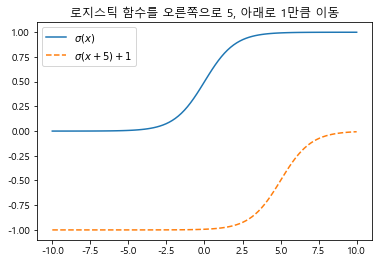

In [34]:
xx = np.linspace(-10, 10, 100)
plt.plot(xx, logistic(xx), label = '$\sigma(x)$', ls = '-')
plt.plot(xx, logistic(xx-5)-1, label = '$\sigma(x+5)+1$', ls = '--')
plt.legend()

#  음수이면 아래쪽으로 이동, 양수이면 위쪽 이동.
plt.title('로지스틱 함수를 오른쪽으로 5, 아래로 1만큼 이동')
plt.show()

* 변수가 둘인 다변수함수를 오른쪽으로 a만큼, 위로 b만큼 평행이동할때는 함수를 다음처럼 변형

<math>f(x,y) -> f(x - a, y - b)</math>

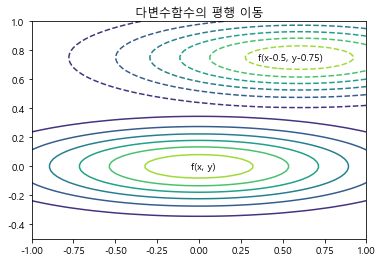

In [35]:
def g(x, y):
    return np.exp(-x ** 2 - 16 * y **2)

xx = np.linspace(-1, 1, 100)
yy = np.linspace(-1, 1, 100)
X, Y = np.meshgrid(xx, yy)
Z1 = g(X, Y)
Z2 = g(X-0.6, Y - 0.75)
plt.contour(X, Y, Z1)
plt.contour(X, Y, Z2, linestyles = '--')
plt.text(-0.05, -0.02, 'f(x, y)')
plt.text(0.35, 0.73, 'f(x-0.5, y-0.75)')
plt.ylim(-0.5, 1)
plt.title("다변수함수의 평행 이동")
plt.show()

**함수의 스케일링**

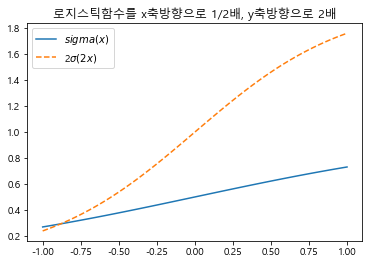

In [36]:
xx = np.linspace(-1, 1, 100)
plt.plot(xx, logistic(xx), label = '$sigma(x)$', ls = '-')
plt.plot(xx, 2 * logistic(2 * xx), label = '2$\sigma(2x)$', ls = '--')
plt.legend()
plt.title("로지스틱함수를 x축방향으로 1/2배, y축방향으로 2배")
plt.show()

## 4.2 심파이를 사용한 함수 미분

#### 예측모형의 성능
데이터분석의 목표는 예측오차가 가장 작은 최적으로 예측모형을 구하는 일.최적으로 모형을 구하기 위해 우리가 할 수 있는 일은 예측 모형 함수의 계수를 바꾸는 것이다.

$\hat{y} = \omega_1x_1 + \omega_2x_2 + ....+ \omega_Nx_N = \omega^Tx$ <br>
우리가 결정 할 수 있는 것은 선형 예측 모형의 가중치 $\omega$, 즉 $\omega_1, \omega_2,...\omega_N$값이다. <br>
이 가중치 $\omega$의 값이 모수다.

* 이와는 반대로 모수를 입력받아 오차 혹은 오류의 크기를 출력하는 함수를 가장 작게 하는 것을 목표로 할 수도 있다. 이런 함수를 손실함수(loss function), 비용함수(cost function), 오차함수(error function)라고 한다.
* 성능함수, 손실함수, 비용함수,오차함수등의 최적화의 대상이 되는 함수를 목적함수라고 함.
* **`미분`** 이라 함은 이러한 목적함수의 목표가 되는 모수를 구하기 위해 입력값에 따른 출력값의 변화를 정량적으로 알아보기위한 과정이 있는데 이를 일컬음이다.
* **`기울기`**를 정의한다면 $x_1 $위치에서는 $x$을 증가시켰을 때 $y$값이 증가한다는 것을 알고 있다면 $x_2$값은 $x_1$보다 더 큰 값을 쓰는 것이 좋다. 반대로 $x_1$위치에서는 $x$를 증가시켜을 때 $y$값이 감소한다면 $x_2$값은 $x_1$보다 더 작은 값을 쓰는 것이 좋다. 이 정보를 **기울기**혹은 **민감도**라고 한다.

* $y = x^3 - 3 * x^2 + x $
* $A의 B에 대한 변화율 = \frac {A의 변화량}  {B의 변화량 }  =  \frac {\mathrm dA}  {\mathrm dB} $

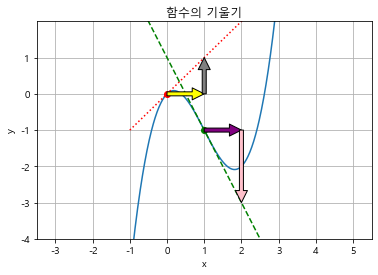

In [71]:
def f(x):
    return x ** 3 - 3 * x ** 2 + x

x = np.linspace(-1, 3, 400) # -1부터 3까지의 400등분
y = f(x)

plt.plot(x, y)
plt.plot(0, 0 ,'ro')  # x좌표 - 0, y좌표 - 0 , 빨간색 동그라미를 마커로 표시
plt.plot(x, x, 'r:')  # X좌표 및 y좌표에 x의 값을 찍어줌. 마커는 빨간색의 점선
plt.plot(1, -1, 'go') # (1, -1) 위치에 초록색 점 표시 
plt.plot(x, (3 * 1 ** 2-6*1+1) * (x-1)-1, 'g--')  # 음수의 기울기를 갖는 초록색 실선을 갖는 직선

plt.xlim(-3.5, 5.5)   # x축의 범위표시
plt.ylim(-4, 2)  # y축의 범위표시

plt.xticks(np.arange(-3, 6)) # x축의 눈금표시
plt.yticks(np.arange(-4, 2))  # y축의 눈금 표시

# 첫번째 파라미터 - 시작점(0, 0)의 주석표시
# 두번째 파라미터 - 화살표가 끝나는 좌표.
# 세번째 파라미터 - 화살표가 시작되는 좌표
# 4번째 파라미터  - 화살표의 속성값.
plt.annotate('', xy = (1, 0), xytext = (0, 0), arrowprops = dict(facecolor = 'yellow'))
plt.annotate('', xy = (1, 1), xytext = (1, 0), arrowprops = dict(facecolor = 'gray'))


plt.annotate('', xy = (2, -1), xytext = (1, -1), arrowprops = dict(facecolor = 'purple'))
plt.annotate('', xy = (2, -3), xytext = (2, -1), arrowprops = dict(facecolor = 'pink'))

plt.xlabel('x')
plt.ylabel('y')
plt.title('함수의 기울기')
plt.grid()
plt.show()

**수치미분**
* `scipy.misc`패키지의 derivative()명령을 사용하면 수치적으로 대략적인 기울기를 계산 할 수 있다.인수로는 기울기를 구하고자 하는 함수 f, 기울기를 구할 위치, 기울기를 구하기 이동할 거리 dx

In [73]:
from scipy.misc import derivative

print(derivative(f, 0, dx = 1e-6))
print(derivative(f, 1, dx = 1e-6))

1.000000000001
-2.000000000002


**미분**
* **어떤 함수로부터 그 함수 기울기를 출력하는 새로운 함수를 만들어 내는 작업** 

미분으로 만들어진 함수를 원래 함수의 **도함수(derivative)** 라고 한다. 

* 렐루함수(Rectified Linear Unit, ReLU)
* `ReLu`함수는 , $x < 0 $인 구간에서는 기울기가 0이고 $x > 0 $인 구간에서는 기울기가 1인 함수

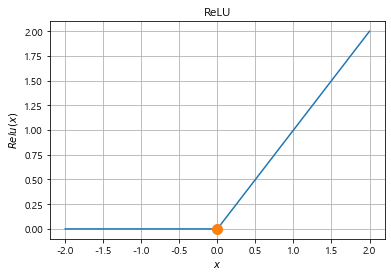

In [79]:
def relu(x):
    return np.where(x > 0, x, 0)  # x가 0보다 크면 x, 아니면 0
    
xx = np.linspace(-2, 2, 100)
plt.plot(xx, relu(xx))

plt.plot(0, 0, marker = 'o', ms = 10)  # 시작위치는 (0, 0) , 마커는 빨간점 , 마커 크기는 10
plt.title("ReLU")
plt.xlabel('$x$')
plt.ylabel('$Relu(x)$')
plt.grid()
plt.show()

#### 선형조합 법칙

In [80]:
help(np.roots)

Help on function roots in module numpy:

roots(p)
    Return the roots of a polynomial with coefficients given in p.
    
    The values in the rank-1 array `p` are coefficients of a polynomial.
    If the length of `p` is n+1 then the polynomial is described by::
    
      p[0] * x**n + p[1] * x**(n-1) + ... + p[n-1]*x + p[n]
    
    Parameters
    ----------
    p : array_like
        Rank-1 array of polynomial coefficients.
    
    Returns
    -------
    out : ndarray
        An array containing the roots of the polynomial.
    
    Raises
    ------
    ValueError
        When `p` cannot be converted to a rank-1 array.
    
    See also
    --------
    poly : Find the coefficients of a polynomial with a given sequence
           of roots.
    polyval : Compute polynomial values.
    polyfit : Least squares polynomial fit.
    poly1d : A one-dimensional polynomial class.
    
    Notes
    -----
    The algorithm relies on computing the eigenvalues of the
    companion matrix [

In [81]:
coeff = [3.2, 2, 1]
np.roots(coeff)

array([-0.3125+0.46351241j, -0.3125-0.46351241j])

x1 : 1.816496580927726, x2 : 0.18350341907227397


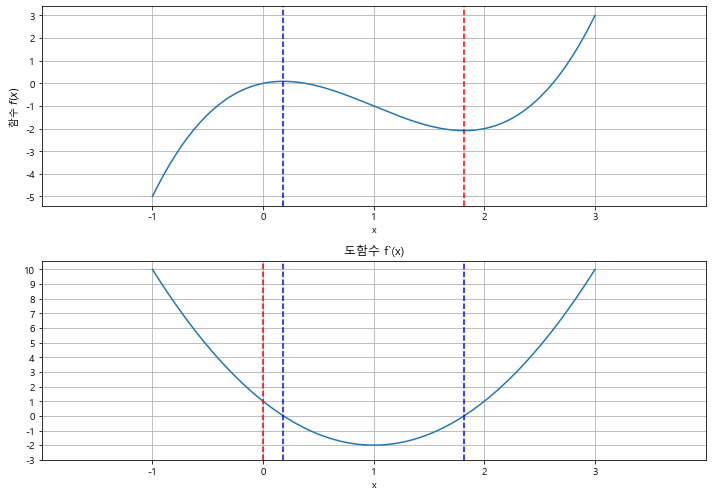

In [92]:
# 함수 f(x)의 도함수
def fprime(x):
    return 3 * x ** 2 -6 * x + 1 

# 2차 방정식의 근
x1, x2 = np.roots([3, -6, 1])
print("x1 : {0}, x2 : {1}".format(x1, x2))

plt.figure(figsize = (10, 7))


plt.subplot(211)
plt.plot(x, f(x))
plt.xlim(-2, 4)
plt.xticks(np.arange(-1, 4))
plt.yticks(np.arange(-5, 4))
plt.xlabel('x')
plt.ylabel('함수 $f(x)$')
plt.axvline(x1, c = 'r', ls = '--')  # 시작점이 x좌표가 x1 : 1.816496580927726 에서 부터 직선을 y축을 그림, 색깔은 빨강, 라인의 스타일은 점선
plt.axvline(x2, c = 'b', ls = '--')  # 시작점이 x좌표가 x2 : 0.1835034190722739 에서 부터 직선을 y축을 그림, 색깔은 빨강, 라인의 스타일은 점선
plt.grid()

plt.subplot(212)
plt.plot(x, fprime(x))
plt.xlim(-2, 4)
plt.xticks(np.arange(-1, 4))
plt.yticks(np.arange(-3, 11))
plt.xlabel('x')
plt.title('도함수 f`(x)')
plt.axvline(0, c = 'r', ls = '--')
plt.axvline(x1, c = 'b', ls = '--')
plt.axvline(x2, c = 'b', ls = '--')

plt.grid()
plt.tight_layout()
plt.show()

### 2차 도함수
* 도함수를 한번 더 미분하여 만들어진 함수를 `**2차 도함수**`라고 함.
* 2차 도함수는 도함수의 기울기를 나타낸다.즉 도함수값이 증가하면 2차 도함숫값은 양수이고, 도함숫갑이 감소하면 2차 도함숫값은 음수다.
* **2차 도함숫값이 양수인 경우를 블록하다** 라고 하며, 2차 도함수값이 음수인 경우를 오목concave라고 함.

* 다음 그래프의 함수는 $f^{\prime\prime}(x)$가 음수인 구간($x < 1$)에서는 오목하고 $f^{\prime\prime}(x)$가 양수인 구간( $x < 1$)에서는 오목하다.

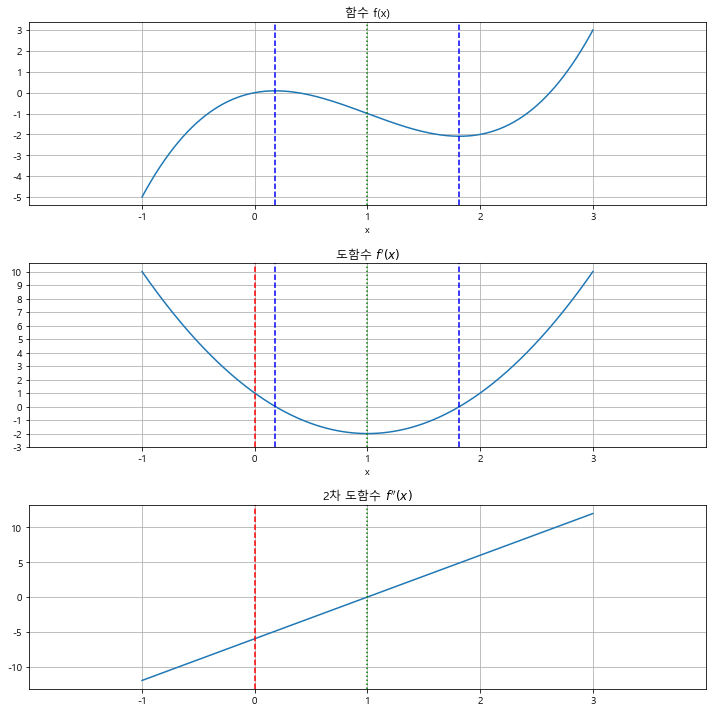

In [99]:
def fprime2(x):
    return 6 * x - 6

# 2차 방정식의 근
x1, x2 = np.roots([3, -6, 1])

x = np.linspace(-1, 3, 400)
plt.figure(figsize = (10, 10))

plt.subplot(311)
plt.plot(x, f(x))
plt.xlim(-2, 4)
plt.xticks(np.arange(-1, 4))
plt.yticks(np.arange(-5, 4))
plt.title('함수 f(x)')
plt.xlabel('x')
plt.axvline(x1, c='b', ls = '--')
plt.axvline(x2, c= 'b', ls = '--')
plt.axvline(1, c = 'g', ls = ':')
plt.grid()

plt.subplot(312)
plt.plot(x, fprime(x))
plt.xlim(-2, 4)
plt.xticks(np.arange(-1, 4))
plt.yticks(np.arange(-3, 11))
plt.title('도함수 $f^{\prime}(x)$')
plt.xlabel('x')
plt.axvline(0, c = 'r', ls = '--')
plt.axvline(x1, c='b', ls = '--')
plt.axvline(x2, c= 'b', ls = '--')
plt.axvline(1, c = 'g', ls = ':')
plt.grid()

plt.subplot(313)
plt.plot(x, fprime2(x))
plt.xlim(-2, 4)
plt.xticks(np.arange(-1,4))
plt.title('2차 도함수 $f^{\prime\prime}(x)$')
plt.axvline(0, c = 'r', ls = '--')
plt.axvline(1, c = 'g', ls = ':')
plt.grid()

plt.tight_layout()
plt.show()

### 편미분

#### 다변수함수의 연쇄법칙, 2차 편미분, 테일러전개 , 심파이
* 만약 함수가 둘 이상의 독립변수를 가지는 다변수 함수인 경우에도, 미분 즉, 기울기는 하나의 변수에 대해서만 구할 수 있다. 이를 **편미분** 이라고 한다.따라서 편미분의 결과로 하나의 함수에 대해서 여러 도함수가 나올수 있다.
* $x, y $ 두 개의 독립변수를 가지는 함수 $f(x, y)$의 편미분 도함수는 다음과 같이 표기 할수 있다.

* $f_x(x, y) = \frac{\partial f}{\partial x}$  
* $f_x(x, y) = \frac{\partial f}{\partial y}$

* 편미분을 하는 방법은 변수가 하나인 함수의 미분과 같다. **다만, 어떤 하나의 독립변수에 대해 미분할때는 다른 독립변수를 상수로 생각하면 된다.**

In [100]:
import sympy

In [102]:
sympy.init_printing(use_latex = 'mathjax')

In [104]:
x = sympy.symbols('x')
x

x

In [106]:
type(x)

sympy.core.symbol.Symbol

In [109]:
f = x * sympy.exp(x)
f

   x
x⋅ℯ 

In [111]:
# 미분
sympy.diff(f)

   x    x
x⋅ℯ  + ℯ 

In [113]:
# 소인수분해
sympy.simplify(sympy.diff(f))

         x
(x + 1)⋅ℯ 

In [116]:
# 편미분을 하는 경우엔 , 어떤 변수로 미분하는지를 diff()함수에 명시해야 함.
# symbols()명령을 사용할 때는 인수로 주는 문자열에 여러 개의 심볼 변수를 동시에 넣을수도있다.
x, y = sympy.symbols('x y')
f = x ** 2 + 4 * x + 4 * y ** 2
f

 2            2
x  + 4⋅x + 4⋅y 

In [117]:
sympy.diff(f, x)

2⋅x + 4

In [119]:
sympy.diff(f, y)

8⋅y

In [121]:
# 상수 심볼을 포함하는 함수를 미분하는 경우, 심파이는 어떤 심볼이 상수이고 어떤 심볼이 변수인지 알 수 없기때문에 편미분인것처럼
# 입력변수를 지정해야 한다.

x, mu, sigma = sympy.symbols('x mu sigma')
f = sympy.exp((x - mu) ** 2 / sigma ** 2)
f

         2
 (-μ + x) 
 ─────────
      2   
     σ    
ℯ         

In [123]:
# x에 대하여 편미분
sympy.diff(f, x)

                      2
              (-μ + x) 
              ─────────
                   2   
                  σ    
(-2⋅μ + 2⋅x)⋅ℯ         
───────────────────────
            2          
           σ           

In [125]:
# 소인수 분해
sympy.simplify(sympy.diff(f, x))

                   2
            (μ - x) 
            ────────
                2   
               σ    
2⋅(-μ + x)⋅ℯ        
────────────────────
          2         
         σ          

In [127]:
# 2차 도함수 
sympy.diff(f, x, x)

                           2
                    (μ - x) 
                    ────────
  ⎛             2⎞      2   
  ⎜    2⋅(μ - x) ⎟     σ    
2⋅⎜1 + ──────────⎟⋅ℯ        
  ⎜         2    ⎟          
  ⎝        σ     ⎠          
────────────────────────────
              2             
             σ              

## 4.3 적분
* 적분(integral)은 미분과 반대되는 개념
* [미분과 적분에 대해서](https://darkpgmr.tistory.com/45)

### 부정적분
* **반-미분(anti-derivative)** 이다. 함수 $f(x)$가 어떤 함수를 미분하여 나온 결과인 도함수라고 가정하고 이 도함수 $f(x)$에 대한 미분되기 전의 원래의 함수를 찾는 과정을 말함.
* $\frac {dF(x)} {dx}  = f(x) \leftrightarrow$  = $\int F(x)dx + C $

### 편미분의 부정적분